## conda install -c conda-forge spacy

In [1]:
import spacy # importing library for reading csv file and NLP task
import pandas as pd

In [3]:
from spacy.lang.en import English
nlp=English()

- !python -m spacy download en_core_web_lg

### Word tokenization

In [4]:

#from spacy.lang.en import English

# Load English tokenizer, tagger, parser, NER and word vectors
nlp = English()

text = """When learning data science, you shouldn't get discouraged!
Challenges and setbacks aren't failures, they're just part of the journey. You've got this!"""

#  "nlp" Object is used to create documents with linguistic annotations.
my_doc = nlp(text)

# Create list of word tokens
token_list = []
for token in my_doc:
    token_list.append(token.text)
print(token_list)

['When', 'learning', 'data', 'science', ',', 'you', 'should', "n't", 'get', 'discouraged', '!', '\n', 'Challenges', 'and', 'setbacks', 'are', "n't", 'failures', ',', 'they', "'re", 'just', 'part', 'of', 'the', 'journey', '.', 'You', "'ve", 'got', 'this', '!']


### sentence tokenization

In [6]:
# Create the pipeline 'sentencizer' component
#sbd = nlp.create_pipe('sentencizer')

# Add the component to the pipeline
nlp.add_pipe('sentencizer')

text = """When learning data science, you shouldn't get discouraged!
Challenges and setbacks aren't failures, they're just part of the journey. You've got this!"""

#  "nlp" Object is used to create documents with linguistic annotations.
doc = nlp(text)

# create list of sentence tokens
sents_list = []
for sent in doc.sents:
    sents_list.append(sent.text)
print(sents_list)

["When learning data science, you shouldn't get discouraged!", "\nChallenges and setbacks aren't failures, they're just part of the journey.", "You've got this!"]


### Stop words

In [7]:
spacy_stopwords = spacy.lang.en.stop_words.STOP_WORDS

#Printing the total number of stop words:
print('Number of stop words: %d' % len(spacy_stopwords))

#Printing first ten stop words:
print('First ten stop words: %s' % list(spacy_stopwords)[:20])

Number of stop words: 326
First ten stop words: ['herein', 'due', 'how', 'you', 'per', 'from', 'than', 'do', 'among', 'beside', 'over', 'eleven', 'therefore', 'ourselves', 'something', 'be', 'by', 'someone', 'whereby', '‘re']


In [8]:
filtered_sent=[]
for word in doc:
    if word.is_stop==False:
        filtered_sent.append(word)
print("Filtered Sentence:",filtered_sent)

Filtered Sentence: [learning, data, science, ,, discouraged, !, 
, Challenges, setbacks, failures, ,, journey, ., got, !]


## Lemmatization

In [11]:
lem = nlp("run runs running runner")
# finding lemma for each word
for word in lem:
    print(word.text,word.lemma_)

run 
runs 
running 
runner 


## Part-of-speech tagging

In [12]:
docp = nlp (" In pursuit of a wall, President Trump ran into one.")

for word in docp:
    print(word.text,word.pos_)

  
In 
pursuit 
of 
a 
wall 
, 
President 
Trump 
ran 
into 
one 
. 


## MODIJI TWEETS

In [13]:
acha_din_aayega=pd.read_csv(r'C:\Users\boston\OneDrive - Boston IT Solutions (India) Private Limited\Documents\Boston Python Contents\ML model and content\NLP Advance\all-narendra-modi-tweets\narendramodi.csv')

In [14]:
acha_din_aayega.head()

,id,conversation_id,created_at,date,time,timezone,user_id,username,name,place,...,photos,replies_count,retweets_count,likes_count,location,hashtags,link,retweet,quote_url,video
0,1113393660295438336,1113393660295438336,1554288709000,2019-04-03,16:21:49,India Standard Time,18839785,narendramodi,Chowkidar Narendra Modi,NaN,...,[],947,3907,13131,NaN,[],https://twitter.com/narendramodi/status/111339...,NaN,NaN,0
1,1113373808545607680,1113373808545607680,1554283976000,2019-04-03,15:02:56,India Standard Time,18839785,narendramodi,Chowkidar Narendra Modi,NaN,...,[],900,3244,10938,NaN,[],https://twitter.com/narendramodi/status/111337...,NaN,NaN,0
2,1113307578522492928,1113307578522492928,1554268185000,2019-04-03,10:39:45,India Standard Time,18839785,narendramodi,Chowkidar Narendra Modi,NaN,...,[],903,3559,11908,NaN,[],https://twitter.com/narendramodi/status/111330...,NaN,NaN,0
3,1113302410494189568,1113302410494189568,1554266953000,2019-04-03,10:19:13,India Standard Time,18839785,narendramodi,Chowkidar Narendra Modi,NaN,...,[],776,4278,14290,NaN,[],https://twitter.com/narendramodi/status/111330...,NaN,NaN,1
4,1113302102913290242,1113302102913290242,1554266880000,2019-04-03,10:18:00,India Standard Time,18839785,narendramodi,Chowkidar Narendra Modi,NaN,...,[],1003,4117,17970,NaN,[],https://twitter.com/narendramodi/status/111330...,NaN,NaN,0


In [15]:
acha_din_aayega.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19583 entries, 0 to 19582
Data columns (total 23 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               19583 non-null  int64  
 1   conversation_id  19583 non-null  int64  
 2   created_at       19583 non-null  int64  
 3   date             19583 non-null  object 
 4   time             19583 non-null  object 
 5   timezone         19583 non-null  object 
 6   user_id          19583 non-null  int64  
 7   username         19583 non-null  object 
 8   name             19583 non-null  object 
 9   place            0 non-null      float64
 10  tweet            19583 non-null  object 
 11  mentions         3130 non-null   object 
 12  urls             19583 non-null  object 
 13  photos           19583 non-null  object 
 14  replies_count    19583 non-null  int64  
 15  retweets_count   19583 non-null  int64  
 16  likes_count      19583 non-null  int64  
 17  location    

In [16]:
acha_din_aayega['tweet']

0        Unprecedented enthusiasm in Kolkata! Bond betw...
1        The mood in Siliguri is clear- people want BJP...
2        Happy to be back in Arunachal Pradesh. Watch l...
3        In Bihar and Odisha, it is NDA all the way.   ...
4        पुन्हा एकदा महाराष्ट्रात येतोय् ! गोंदिया येथे...
                               ...                        
19578    Narendrabhai Modi: Through water conservation ...
19579    Women would play a crucial role in the develop...
19580    Most awaited gujarati version of www.narendram...
19581    An inspiring address to Scouts & Guides in Jam...
19582    2nd Feb, I will be in Dahod for Gujarat Swarni...
Name: tweet, Length: 19583, dtype: object

the column **tweet** has tweet by Modiji few are having langauage other than english!!!, let's ask spacy to identify text with englidh language only.......

Lets install a package **pip install spacy-langdetect** to detect language 

In [18]:
!pip install spacy-langdetect

  Using cached spacy_langdetect-0.1.2-py3-none-any.whl (5.0 kB)
  Using cached langdetect-1.0.7.zip (998 kB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
     ------------------------------------ 317.2/317.2 kB 756.1 kB/s eta 0:00:00
  Created wheel for langdetect: filename=langdetect-1.0.7-py3-none-any.whl size=993416 sha256=686772ee1babe0965676f2f79dca5f2ed4457b57bd59e7609affe57ed83662bc
  Stored in directory: c:\users\boston\appdata\local\pip\cache\wheels\87\8c\9a\41c0647bd03b3e11ca6968d3638a4e6e764220adf2886270cb
Successfully built langdetect


In [20]:
from spacy.language import Language
from spacy_langdetect import LanguageDetector

def get_lang_detector(nlp, name):
    return LanguageDetector()

nlp = spacy.load("en_core_web_sm")
Language.factory("language_detector", func=get_lang_detector)
nlp.add_pipe('language_detector', last=True)
text = 'This is an english text.'
doc = nlp(text)
print(doc._.language)

{'language': 'en', 'score': 0.9999963053009923}


In [21]:
doc.lang_

'en'

Lets create a function and apply on that column

In [22]:
def eng_detect(text):
    doc = nlp(text)
    return doc._.language['language']

In [23]:
acha_din_aayega['Language']=acha_din_aayega['tweet'].apply(eng_detect)

In [24]:
acha_din_aayega['Language'].value_counts()

en         17620
hi          1105
id            99
gu            73
ja            50
es            41
ru            38
kn            37
ar            37
so            37
ne            28
sw            25
ko            24
bn            22
ta            22
fr            21
mr            20
te            19
de            19
nl            18
tr            18
UNKNOWN       17
he            17
af            16
pt            12
fa            11
et            11
zh-cn         10
pa            10
sv             9
fi             9
ml             9
vi             9
th             8
tl             7
cy             7
it             6
no             5
hu             5
da             4
hr             4
sq             3
sk             3
cs             3
ca             3
ro             3
sl             2
ur             2
el             1
pl             1
zh-tw          1
uk             1
bg             1
Name: Language, dtype: int64

In [26]:
acha_din_aayega['tweet'][acha_din_aayega['Language']=='en'].head(10)

0     Unprecedented enthusiasm in Kolkata! Bond betw...
1     The mood in Siliguri is clear- people want BJP...
2     Happy to be back in Arunachal Pradesh. Watch l...
3     In Bihar and Odisha, it is NDA all the way.   ...
7     Glad to be going back to Arunachal Pradesh tod...
8     Congress governs in reverse gear, and because ...
9     How times change!  Those who took part in the ...
10    The campaign in Bihar couldn’t have started on...
11    Kalahandi symbolizes the abysmal failure of Co...
12    Odisha is going to do what UP did in 2017 and ...
Name: tweet, dtype: object

In [27]:
modi_en_tweet=acha_din_aayega['tweet'][acha_din_aayega['Language']=='en'].tolist()

##  Named Entity Recognition

## Entities Explained

| Type | 	Description|
|:---|:---
| PERSON |	People, including fictional. |
| NORP | Nationalities or religious or political groups.| 
| FAC|  	Buildings, airports, highways, bridges, etc.| 
| ORG|  	Companies, agencies, institutions, etc.| 
| GPE|  	Countries, cities, states.| 
| LOC|  	Non-GPE locations, mountain ranges, bodies of water.| 
| PRODUCT|  	Objects, vehicles, foods, etc. (Not services.)| 
| EVENT|  	Named hurricanes, battles, wars, sports events, etc.| 
| WORK_OF_ART|  	Titles of books, songs, etc.| 
| LAW|  	Named documents made into laws.| |
| LANGUAGE|  	Any named language.| 
| DATE|  	Absolute or relative dates or periods.| 
| TIME|  	Times smaller than a day.| 
| PERCENT|  	Percentage, including "%".| 
| MONEY|  	Monetary values, including unit.| 
| QUANTITY|  	Measurements, as of weight or distance.| 
| ORDINAL|  	"first", "second", etc.| 
| CARDINAL|  	Numerals that do not fall under another type.| 

Let's look at some examples of above in real world sentences. We will also use the `spacy.explain()` on all entities for one example - to build a quick mental model of how these things work.

In [28]:
def explain_text_entities(text):
    doc = nlp(text)
    for ent in doc.ents:
        print(f'Entity: {ent}, Label: {ent.label_}, {spacy.explain(ent.label_)}')

In [29]:
explain_text_entities(modi_en_tweet[0])

Entity: Kolkata, Label: GPE, Countries, cities, states
Entity: Bengal, Label: GPE, Countries, cities, states
Entity: BJP, Label: ORG, Companies, agencies, institutions, etc.


In [30]:
modi_en_tweet[0]

'Unprecedented enthusiasm in Kolkata! Bond between Bengal and BJP is getting stronger! https://www.pscp.tv/w/b3SHxDMyMjExNTJ8MVJEeGxxQVBPTHpLTFhzyr5mXiaCvwzlRZRkugStbEHEKSY2cpzyHiLvrRKK\xa0…'

In [31]:
one_sentence = modi_en_tweet[0]
doc = nlp(one_sentence)
spacy.displacy.render(doc, style='ent',jupyter=True)

In [32]:
one_sentence = modi_en_tweet[3]
doc = nlp(one_sentence)
spacy.displacy.render(doc, style='ent',jupyter=True)

In [33]:
one_sentence = modi_en_tweet[90]
doc = nlp(one_sentence)
spacy.displacy.render(doc, style='ent',jupyter=True)

## Redacting Names

One simple use case for NER is to automatically redact names. This is important and quite useful. 

For example, 

- to ensure that your company data actually complies with GDPR 
- when journalists wants to publish a large set of documents while still hiding the identity of their sources

We do this redaction by following broad steps:

```markdown
1. find all PERSON names
2. replace these by a filler like ["REDACTED"]
```

In [42]:
def redact_names(text):
    doc = nlp(text)
    redacted_sentence = []
    with doc.retokenize() as retokenizer:
        for ent in doc.ents:
            retokenizer.merge(ent)
        for token in doc:
            if token.ent_type_ == "PERSON":
                redacted_sentence.append("[REDACTED]")
            else:
                redacted_sentence.append(token.text)
    return "".join(redacted_sentence)

In [38]:
from IPython.display import Markdown, display
def printmd(string, color=None):
    colorstr = "<span style='color:{}'>{}</span>".format(color, string)
    display(Markdown(colorstr))

In [43]:
printmd("**Before**", color="blue")
one_sentence = modi_en_tweet[8]
doc = nlp(one_sentence)
spacy.displacy.render(doc, style='ent',jupyter=True)
printmd("**After**", color="blue")
one_sentence = redact_names(modi_en_tweet[8])
doc = nlp(one_sentence)
spacy.displacy.render(doc, style='ent',jupyter=True)

printmd("Notice that `Kalahandi,Rajiv Gandhi` was removed", color="#6290c8")

<span style='color:blue'>**Before**</span>

<span style='color:blue'>**After**</span>

C:\Users\boston\miniconda3\lib\site-packages\spacy\displacy\__init__.py:211: UserWarning: [W006] No entities to visualize found in Doc object. If this is surprising to you, make sure the Doc was processed using a model that supports named entity recognition, and check the `doc.ents` property manually if necessary.
  warnings.warn(Warnings.W006)


<span style='color:#6290c8'>Notice that `Kalahandi,Rajiv Gandhi` was removed</span>

## Part-of-Speech Tagging

Sometimes, we want to quickly pull out keywords, or keyphrases from a larger body of text. This helps us mentally paint a picture of what this text is about. This is particularly helpful in analysis of texts like long emails or essays.

As a quick hack, we can pull out all relevant "nouns". This is because most keywords are in fact nouns of some form.

### Noun Chunks
We need noun chunks. Noun chunks are noun phrases - not a single word, but a short phrase which describes the noun. For example, "the blue skies" or "the world’s largest conglomerate".

To get the noun chunks in a document, simply iterate over doc.noun_chunks:


In [44]:
example_text = modi_en_tweet[9]
doc = nlp(example_text)
spacy.displacy.render(doc, style='ent', jupyter=True)

for idx, sentence in enumerate(doc.sents):
    for noun in sentence.noun_chunks:
        print(f"sentence {idx+1} has noun chunk '{noun}'")

sentence 1 has noun chunk 'Odisha'
sentence 1 has noun chunk 'what'
sentence 1 has noun chunk 'UP'
sentence 1 has noun chunk 'Tripura'
sentence 2 has noun chunk 'Odias'
sentence 2 has noun chunk 'freedom'
sentence 2 has noun chunk 'mining mafias'
sentence 2 has noun chunk 'chit fund looters'
sentence 2 has noun chunk 'those'
sentence 2 has noun chunk 'who'
sentence 2 has noun chunk 'good healthcare'
sentence 3 has noun chunk '19 years'
sentence 3 has noun chunk 'power'
sentence 3 has noun chunk 'BJD's track record'
sentence 4 has noun chunk 'The state'
sentence 4 has noun chunk 'BJP'
sentence 5 has noun chunk 'pictures'
sentence 5 has noun chunk 'Kalahandi'


# What does MODI talk about? 

In [45]:
modi_tweet=acha_din_aayega['tweet'][acha_din_aayega['Language']=='en']

In [46]:
text = modi_tweet.str.cat(sep=' ')
# spaCy enforces a max limit of 1000000 characters for NER and similar use cases.
# Since `text` might be longer than that, we will slice it off here
max_length = 1000000-1
text = text[:max_length]

# removing URLs and '&amp' substrings using regex
import re
url_reg  = r'[a-z]*[:.]+\S+'
text   = re.sub(url_reg, '', text)
noise_reg = r'\&amp'
text   = re.sub(noise_reg, '', text)

In [47]:
doc = nlp(text)

In [49]:
!pip install seaborn

  Using cached seaborn-0.12.2-py3-none-any.whl (293 kB)


In [50]:
import seaborn as sns
import matplotlib.pyplot as plt

In [51]:
items_of_interest = list(doc.noun_chunks)
# each element in this list is spaCy's inbuilt `Span`, which is not useful for us
items_of_interest = [str(x) for x in items_of_interest]
# so we've converted it to string

In [52]:
df_nouns = pd.DataFrame(items_of_interest, columns=["Modisays"])

In [53]:
df_nouns.head()

,Modisays
0,Unprecedented enthusiasm
1,Kolkata
2,Bond
3,Bengal
4,BJP


In [54]:
df_nouns['Modisays'].value_counts()

I                               1359
India                            784
We                               464
you                              420
who                              365
                                ... 
the heath                          1
dairy sector                       1
our men's Kabaddi team             1
substantial progress               1
a very old & warm friendship       1
Name: Modisays, Length: 15994, dtype: int64

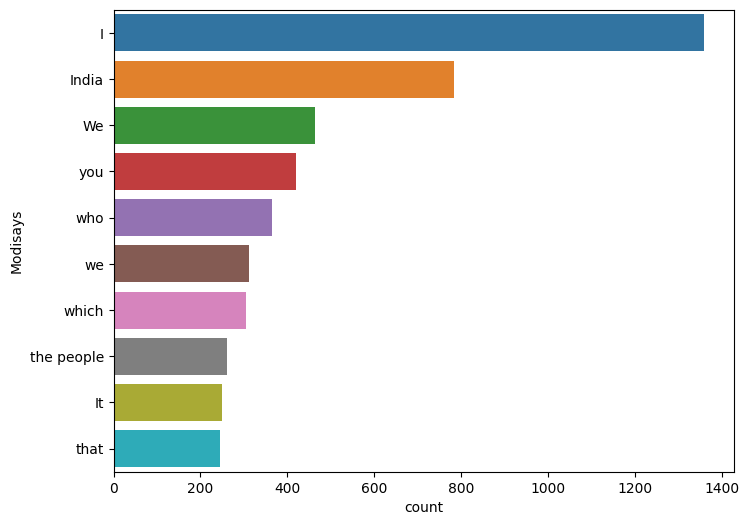

In [55]:
plt.figure(figsize=(8,6))
sns.countplot(y="Modisays",
             data=df_nouns,order=df_nouns["Modisays"].value_counts().iloc[:10].index)
plt.show()

**Let's remove these filler words and try again!**

In [56]:
modi_topics = []
for token in doc:
    if (not token.is_stop) and (token.pos_ == "NOUN") and (len(str(token))>2):
        modi_topics.append(token)
        
modi_topics = [str(x) for x in modi_topics]

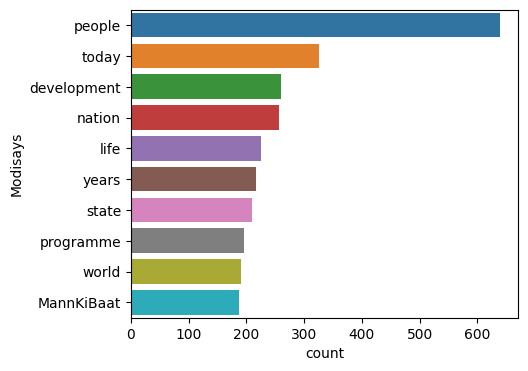

In [57]:
df_nouns = pd.DataFrame(modi_topics, columns=["Modisays"])
df_nouns
plt.figure(figsize=(5,4))
sns.countplot(y="Modisays",
             data=df_nouns,
             order=df_nouns["Modisays"].value_counts().iloc[:10].index)
plt.show()

## Exploring Entities

In [58]:
modiji_topics = []
for ent in doc.ents:
    if ent.label_ not in ["PERCENT", "CARDINAL", "DATE"]:
#         print(ent.text,ent.label_)
        modiji_topics.append(ent.text.strip())

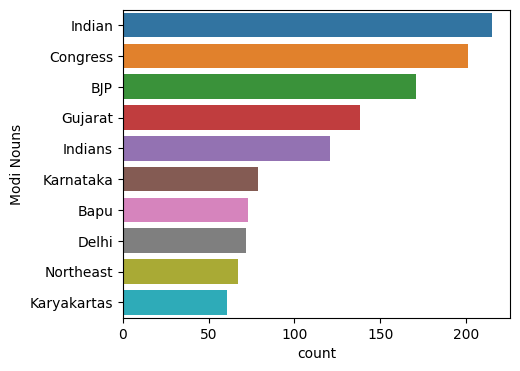

In [59]:
df_ttopics = pd.DataFrame(modiji_topics, columns=["Modi Nouns"])
plt.figure(figsize=(5,4))
sns.countplot(y="Modi Nouns",
             data=df_ttopics,
             order=df_ttopics["Modi Nouns"].value_counts().iloc[1:11].index)
plt.show()

In [61]:
!pip install wordcloud

     -------------------------------------- 153.1/153.1 kB 4.6 MB/s eta 0:00:00


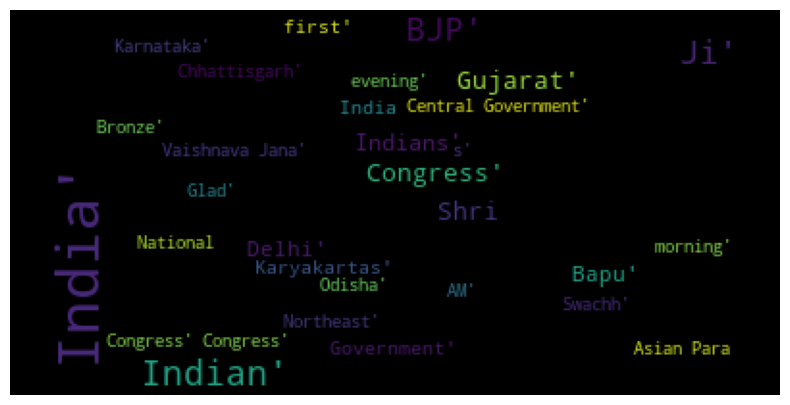

In [62]:
from spacy.lang.en.stop_words import STOP_WORDS
from wordcloud import WordCloud
plt.figure(figsize=(10,5))
wordcloud = WordCloud(stopwords = STOP_WORDS,
                      max_words=30,
                      max_font_size=30,
                      random_state=1234
                     ).generate(str(modiji_topics))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

## Dependency Parsing

Depenency parsing is a language processing technique that allows us to better determine the meaning of a sentence by analyzing how it’s constructed to determine how the individual words relate to each other.

Consider, for example, the sentence “Bill throws the ball.” We have two nouns (Bill and ball) and one verb (throws). But we can’t just look at these words individually, or we may end up thinking that the ball is throwing Bill! To understand the sentence correctly, we need to look at the word order and sentence structure, not just the words and their parts of speech.

Doing this is quite complicated, but thankfully spaCy will take care of the work for us! Below, let’s give spaCy another short sentence pulled from the news headlines. Then we’ll use another spaCy called noun_chunks, which breaks the input down into nouns and the words describing them, and iterate through each chunk in our source text, identifying the word, its root, its dependency identification, and which chunk it belongs to.

### python -m spacy download en_core_web_sm

In [63]:
modi_en_tweet[22]

'The Mahayuti Government has taken special care of agriculture and irrigation in Maharashtra.  When farmers asked Congress-NCP leaders for water in irrigation projects they got vulgar and unparliamentary answers.  When farmers asked for help, Congress-NCP gave them bullets. pic.twitter.com/fop78rdE9C'

In [64]:
nlp = spacy.load('en_core_web_sm')
docp = nlp (modi_en_tweet[22])

for chunk in docp.noun_chunks:
    print(chunk.text, chunk.root.text, chunk.root.dep_,
          chunk.root.head.text)

The Mahayuti Government Government nsubj taken
special care care dobj taken
agriculture agriculture pobj of
irrigation irrigation conj agriculture
Maharashtra Maharashtra pobj in
farmers farmers nsubj asked
Congress-NCP leaders leaders dobj asked
water water pobj for
irrigation projects projects pobj in
they they nsubj got
vulgar and unparliamentary answers answers dobj got
farmers farmers nsubj asked
help help pobj for
Congress-NCP NCP nsubj gave
them them dative gave
bullets bullets dobj gave


In [65]:
spacy.displacy.render(docp, style="dep", jupyter= True)